**R入門（その12）**

---
**このノートブックについて**<br>
このColabのノートブック「R入門（その12）」では「Rで乱数（正確には疑似乱数）を発生させる方法」を解説します。

<br>すでに「[R入門（その1）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_1_basic.ipynb)」を読んでいることを前提に説明します。未読の人は「R入門（その1）」を先に読んでください。
<br>
> 注：このノートブックは駒澤大学経済学部で開講している「経済統計a/b」で「Excel以外の手法を学ぶ意欲がある履修生向け」に**最低限の知識**だけ解説する**補助資料**です

Rでの乱数発生について詳しく知りたい人は<br>
**RjpWikiの乱数Tips大全**<br>
http://www.okadajp.org/RWiki/?%E4%B9%B1%E6%95%B0Tips%E5%A4%A7%E5%85%A8

**参考文献**<br>https://www.rdocumentation.org/packages/purrr/versions/0.2.5/topics/rdunif


**最初に呪文（全オブジェクトの削除）**<br>最初にちょっとした呪文を入れましょう。<br>（補足：以下の呪文rm(list=ls())は既にあるオブジェクトを全部削除するコマンドです。必須ではありませんが、場合によってはトラブルを避けるために役立つことがあります。）


In [1]:
rm(list=ls())

In [2]:
require(tidyverse)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**離散一様乱数**

離散一様乱数を発生させるメソッドはrdunif()です。以下のようにパラメーターを指定します。

rdunif(n=発生させる乱数の個数, b=下限, a=上限)

たとえば、0から9までの整数から離散一様乱数を100個発生させる場合、以下のように入力します。

> こぼれ話：（統計解析環境としての）Rにあまり不満ないのですが、Rのbaseに離散一様乱数を発生させる関数がない点についてはいつも不可解に思っています(rdunifはパッケージpurrの関数です)。そのため、「min=下限, max=上限」とならず、「b=下限, a=上限」と指定します。extraDistrを使うことも可能なのですが、Colabでは一々インストールしなければならないので、面倒です。


In [3]:
numb_int <- rdunif(n=100, b=0, a=9)
numb_int

[1] 0 9 4 3 4 8 9 9 5 0 4 5 2 5 4 6 7 3 5 3 6 9 8 3 3 8 3 6 3 9 0 3 4 3 2 0 7
 [38] 8 3 2 4 2 4 7 9 9 6 9 9 7 7 5 4 7 8 0 6 3 8 4 1 2 6 7 7 0 5 5 7 9 9 2 9 9
 [75] 1 7 3 6 1 1 0 0 7 5 2 5 2 8 6 9 8 1 4 6 1 7 8 1 5 7

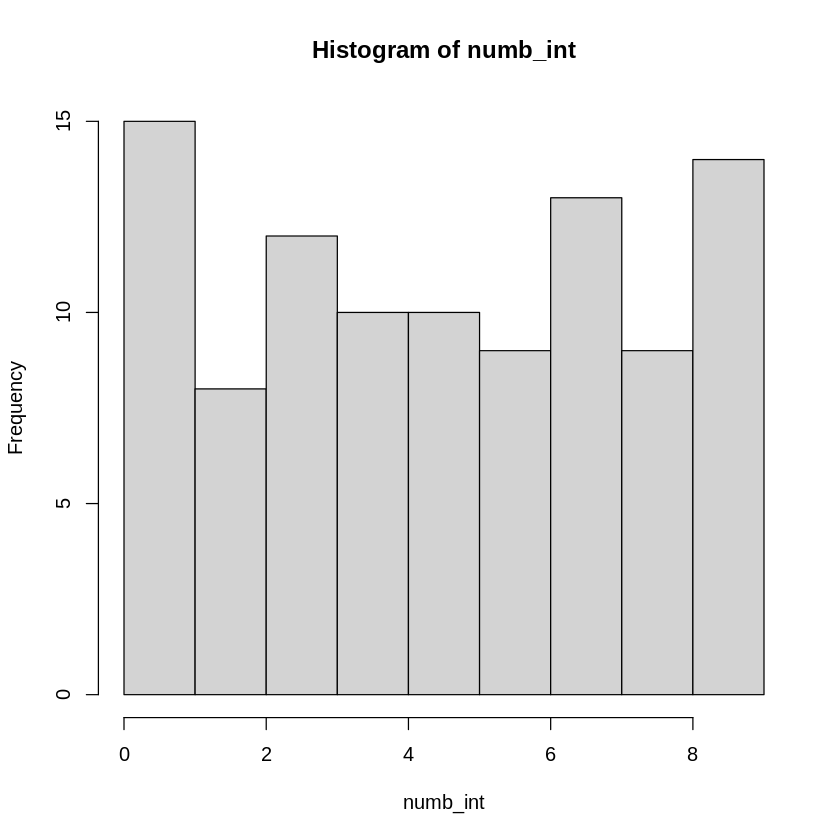

In [4]:
hist(numb_int)

**連続一様乱数**

連続一様乱数を発生させるメソッドはrunif()です。以下のようにパラメーターを指定します。

runif(n=発生させる乱数の個数, min=下限, max=上限)

たとえば、下限が0、上限が1である連続一様乱数を10000個発生させる場合、以下のように入力します。

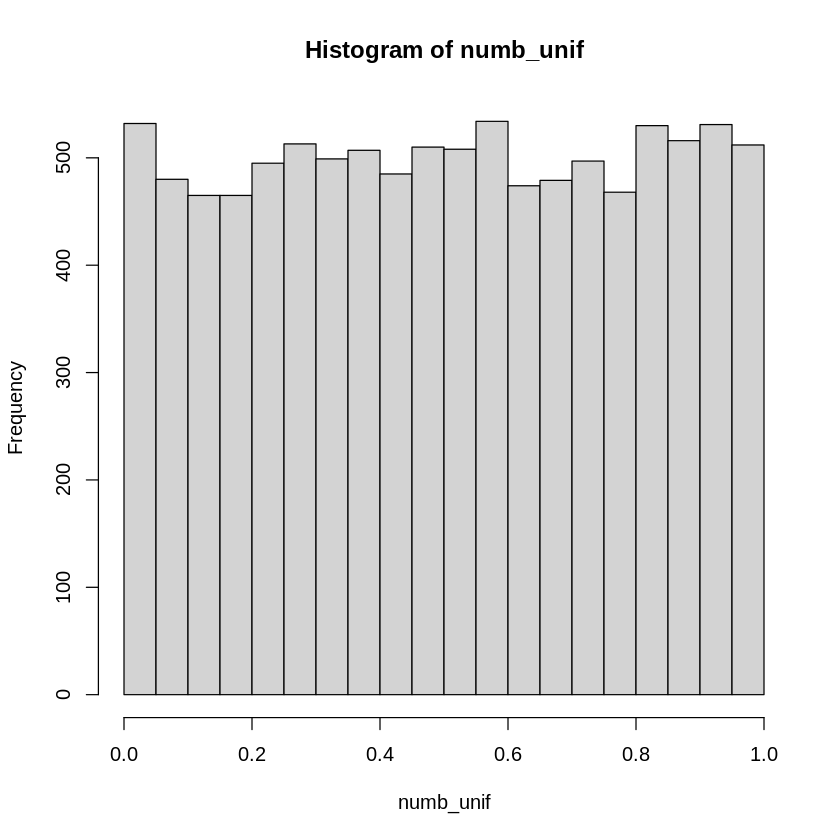

In [5]:
numb_unif <- runif(n=10000, min=0, max=1)
hist(numb_unif)

**正規乱数**

正規乱数を発生させるメソッドはrnorml()です。

$X \sim \mathcal{N}(\mu,\,\sigma^{2})$

以下のようにパラメーターを指定します。

rnorm(n=発生させる乱数の個数, 平均, 標準偏差)

たとえば、平均が0、標準偏差が1である正規乱数を10000個発生させる場合、以下のように入力します。

> こぼれ話：R（のbase）には標準正規乱数を発生させる専用の関数はありませんので、mu=0, sd=1と設定します。


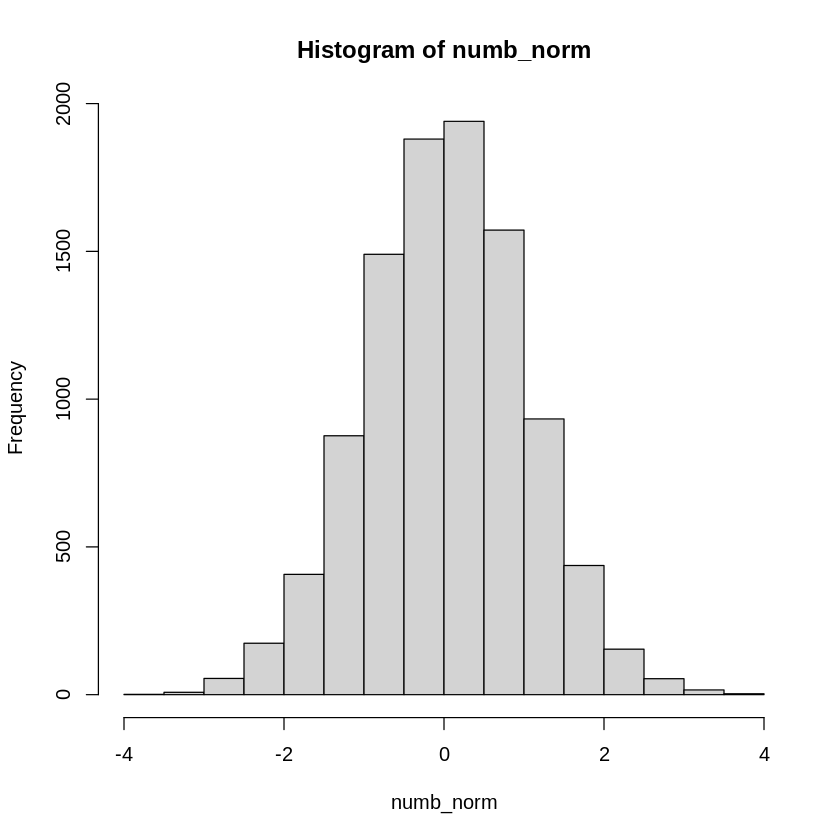

In [6]:
numb_norm <- rnorm(n=10000, m=0, sd=1)
hist(numb_norm)

**どっちがランダム？**

Rで乱数と低食い違い列（超一様分布列）を発生させ、二つの散布図をプロットしてみよう。

In [26]:
install.packages("randtoolbox")
require(randtoolbox)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
500 -> rnd_num 
data.frame(runif(rnd_num, min=0, max=1), runif(rnd_num, min=0, max=1)) -> rnd_df_1
 c("first", "second") -> colnames(rnd_df_1) 
rnd_df_1 |> head()

,first,second
,<dbl>,<dbl>
1,0.86363231,0.25562812
2,0.73887758,0.11816116
3,0.77145545,0.04706008
4,0.03980086,0.92868632
5,0.91585433,0.28811371
6,0.88883785,0.95001825


In [36]:
data.frame(halton(rnd_num, dim=2)) -> rnd_df_2
 c("first", "second") -> colnames(rnd_df_2) 
rnd_df_2 |> head()

,first,second
,<dbl>,<dbl>
1,0.500,0.3333333
2,0.250,0.6666667
3,0.750,0.1111111
4,0.125,0.4444444
5,0.625,0.7777778
6,0.375,0.2222222


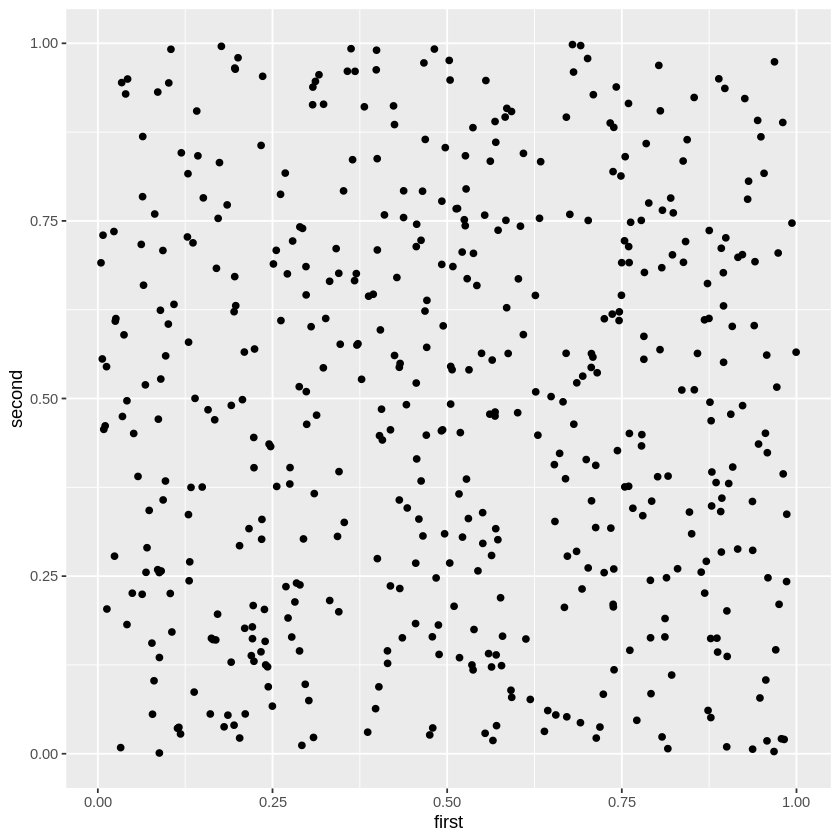

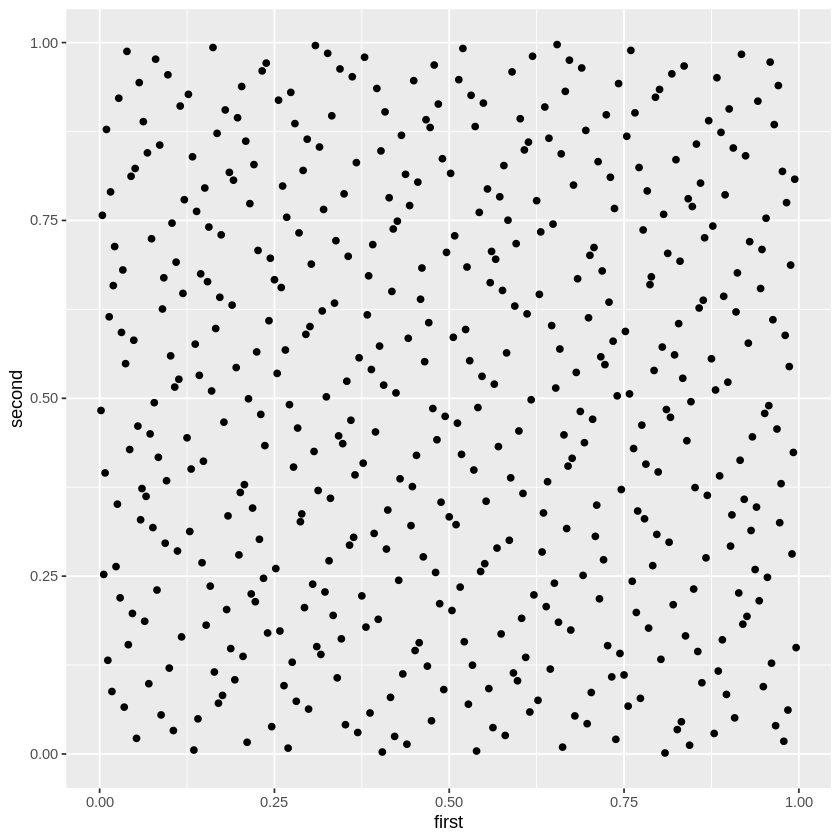

In [37]:
rnd_df_1 |> ggplot(aes(x=first, y=second)) + geom_point() 
rnd_df_2 |> ggplot(aes(x=first, y=second)) + geom_point() 

**どっちがランダム？**

もちろん、最初の散布図のほうがランダムです。

興味がある人は以下のエッセイもどうぞ。<br>https://koiti-yano.hatenablog.com/entry/20080211/p1